This notebook is a simple introduction to pytorch, assuming you already know  python, numpy and the notebooks. PyTorch is a python module dedicated to deep-learning. Everything is based on a specific data structure: the tensor.

Machine learning basically relies on three components:
- the model: in this course this is a Neural Network and in pytorch a **module**
- the model is trained to minimize a **loss** function
- this minization can be achieved with gradient descent (or one of its variant) with an **optimizer**.
In this notbook we will introduce these 3 components and also the basic data structure (the tensors).


To start with pytorch, here are some external websites:
- http://pytorch.org/tutorials/ : official tutorials
- http://pytorch.org/docs/master/ : official documentation

Before, check the version of pytorch

In [1]:
import torch as th
print(th.__version__)
import matplotlib.pyplot as plt
import torch.nn as nn

2.0.1+cu118


You should have a version of at least 1.0.0.

You should have a version of at least 1.0.0.
# Pytorch overview

## Tensor  overview
For users who are familiar with numpy arrays, the PyTorch **Tensor** class is very similar. PyTorch is like NumPy, but with GPU acceleration and automatic computation of gradients. This  makes it suitable for deep learning: calculating backward pass data automatically starting from a forward expression.

The forward pass is implemented as a computation graph. The **Tensor** is the basic piece of this computation graph, to encode the data (input/output) and the parameters of the model.
A Tensor is both a tensor (like a numpy array or a matlab matrix) and a variable (or a node) of the computation graph. A Tensor can store data and the associated gradients.



**IMPORTANT NOTE: ** Since torch 0.3, a **Tensor** is a **Variable** that wraps a tensor. Before these 2 concepts were separated.

## Module overview

A module is a part of a NNet. It may contains Tensors. The core PyTorch modules for building neural networks are located in *torch.nn*, which provides common neural network layers and other architectural components. Fully connected layers, convolutional layers, activation functions, and loss functions can all be found here. Modules can be seen as pre-built pieces of computation graph.

A simple example of *module* is `Linear`: it's a fully connected layer, so a linear transformation of the input. It contains a matrix of parameters (a Tensor). Activation function are also `Module`. You can therefore create a cascade of `Linear` module with a `Sigmoid`, for example.

A special kind of module is a *container* : a module that contains other module. The most widely used is `Sequential`: it's a container to implement a feed-forward network. When you create a `Sequential` object you pass him an ordered list of modules to create the cascade of operation.


## Gradient computation and optimization
To learn the model, we need to things:
- Compute the gradient of the loss with respect to the parameters. The gradients are computed via auto-differentiation. This is the role of the **backward** function.  
- Update the parameters, with these gradient values. This is the role of the **optimizer**. The optimizer is an object that manage the gradient descent updates.


# Tensor

To start with  *Tensor*s, read this link first :
http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html.
and then look at the operations on tensors:  http://pytorch.org/docs/master/torch.html.

## Basics
Now, you can answer the following questions:
* Build a tensor of dimensions (2,3) filled with integers from 1  to 6.
* Convert this  Tensor in array numpy and back.
* Compute the sum of its elements, the sum per rows and per columns.
* Build a tensor of dimensions (3,2) filled with random numbers. Numbers are drawn from the uniform distribution on [0,1]
* Same with a gaussian  (mean=0, variance=1).

Remember, you can use ask for help, like in the following cell.
But in most of the case it is easier to use the online documentation of the function: https://pytorch.org/docs/stable/torch.html#torch.arange

In [2]:
# A hint
help(th.arange)


Help on built-in function arange in module torch:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.
    
    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsistency, we advise adding a small epsilon to :attr:`end`
    in such cases.
    
    .. math::
        \text{out}_{{i+1}} = \text{out}_{i} + \text{step}
    
    Args:
        start (Number): the starting value for the set of points. Default: ``0``.
        end (Number): the ending value for the set of points
        step (Number): the gap between each pair of adjacent points. Default: ``1``.
    
    Keyword args:
        out 

In [3]:
# TODO

# Tensor with dim (2,3)
Tensor = th.arange(1,7).reshape(2,3)
print(f"Tensor d(2,3) filled from 1 to 6 \n {Tensor} \n")

# Tensor -> Numpy
Numpy = Tensor.cpu().detach().numpy()
print(f"Numpy from Pytorch tensor: \n {Numpy} \n")
Tensor = th.from_numpy(Numpy)
print(f"Pytorch tensor from Numpy: \n {Tensor} \n")

# Sum per rows and columns
Sum_Rows = th.sum(Tensor,1)
print(f"Sum per rows: \n {Sum_Rows} \n")
Sum_Column = th.sum(Tensor,0)
print(f"Sum per columns: \n {Sum_Column} \n")

# Random tensor with dim (3,2)
Random_Tensor_1 = th.rand(3,2)
print(f"Random tensor d(2,3) drawn from uniform distribution on [0,1]: \n {Random_Tensor_1} \n")
Random_Tensor_Gaussian = th.normal(0, 1, size=(3, 2))
print(f"Random tensor d(2,3) drawn from normal distribution with mean 0 and variance 1: \n {Random_Tensor_Gaussian} \n")

Tensor d(2,3) filled from 1 to 6 
 tensor([[1, 2, 3],
        [4, 5, 6]]) 

Numpy from Pytorch tensor: 
 [[1 2 3]
 [4 5 6]] 

Pytorch tensor from Numpy: 
 tensor([[1, 2, 3],
        [4, 5, 6]]) 

Sum per rows: 
 tensor([ 6, 15]) 

Sum per columns: 
 tensor([5, 7, 9]) 

Random tensor d(2,3) drawn from uniform distribution on [0,1]: 
 tensor([[0.9969, 0.1860],
        [0.4957, 0.6266],
        [0.8328, 0.0799]]) 

Random tensor d(2,3) drawn from normal distribution with mean 0 and variance 1: 
 tensor([[-0.3921, -0.1445],
        [-1.5728, -0.8736],
        [-2.3141,  0.4746]]) 



## Operation and access

* Extract the first row and the last row (do the same with columns)
* Build a matrix  A of dimension (2,3), a matrix  B (2,1) et and  C (1,4) with random initialisation.
* Concatenate A with B, and add the results with C.
* Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A.

In [4]:
# Extraction of rows and columns
print(f"First row: \n {Tensor[0,:]} \n")
print(f"Last row: \n {Tensor[-1,:]} \n")
print(f"First column: \n {Tensor[:,0]} \n")
print(f"Last column: \n {Tensor[:,-1]} \n")

# Random initialisated matrix A, B, C and concatenation
A = th.rand(2,3)
B = th.rand(2,1)
C = th.rand(1,4)
print(f"A, B, C matrices: \n A = {A} \n B = {B} \n C = {C} \n")

D = th.cat((A,B),1)
print(f"A, B concatenated (D matrix): \n D = {D} \n")

E = th.cat((D,C),0)
print(f"D, C concatenated (E matrix): \n E = {E} \n")

# New A(3,4) and new B(3,4) from A's rows
A = th.rand(5,4)
print(f"New A \n A = {A} \n")
B = th.stack((A[1,:],A[0,:],A[3,:]),0)
print(f"New B \n B = {B} \n")

First row: 
 tensor([1, 2, 3]) 

Last row: 
 tensor([4, 5, 6]) 

First column: 
 tensor([1, 4]) 

Last column: 
 tensor([3, 6]) 

A, B, C matrices: 
 A = tensor([[0.9764, 0.4693, 0.3059],
        [0.0217, 0.7267, 0.1490]]) 
 B = tensor([[0.4299],
        [0.8262]]) 
 C = tensor([[0.4814, 0.6020, 0.7020, 0.3663]]) 

A, B concatenated (D matrix): 
 D = tensor([[0.9764, 0.4693, 0.3059, 0.4299],
        [0.0217, 0.7267, 0.1490, 0.8262]]) 

D, C concatenated (E matrix): 
 E = tensor([[0.9764, 0.4693, 0.3059, 0.4299],
        [0.0217, 0.7267, 0.1490, 0.8262],
        [0.4814, 0.6020, 0.7020, 0.3663]]) 

New A 
 A = tensor([[0.1971, 0.8043, 0.3577, 0.2929],
        [0.9092, 0.1413, 0.8583, 0.3365],
        [0.3426, 0.4738, 0.6919, 0.0516],
        [0.6948, 0.5307, 0.1949, 0.9738],
        [0.6190, 0.4897, 0.6256, 0.4618]]) 

New B 
 B = tensor([[0.9092, 0.1413, 0.8583, 0.3365],
        [0.1971, 0.8043, 0.3577, 0.2929],
        [0.6948, 0.5307, 0.1949, 0.9738]]) 



Look at the following code and how  x2 is built from x.

In [5]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=1)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=2)
print (x2[0])
print (x2.size())


tensor([[ 1.7888, -1.5729, -1.0135, -1.0318],
        [-1.1062, -0.2177, -0.8489, -0.3111],
        [-1.4707, -1.6097, -0.9684, -0.0260],
        [ 1.0543,  0.0309, -0.4977,  1.0468],
        [ 0.3197, -1.9202, -2.6006, -1.1368]])
tensor([[ 1.7888, -1.5729, -1.0135, -1.0318],
        [-1.1062, -0.2177, -0.8489, -0.3111],
        [-1.4707, -1.6097, -0.9684, -0.0260],
        [ 1.0543,  0.0309, -0.4977,  1.0468],
        [ 0.3197, -1.9202, -2.6006, -1.1368]])
torch.Size([2, 5, 4])
tensor([[ 1.7888, -1.5729, -1.0135, -1.0318],
        [ 1.7888, -1.5729, -1.0135, -1.0318]])
torch.Size([5, 2, 4])
tensor([[ 1.7888,  1.7888],
        [-1.5729, -1.5729],
        [-1.0135, -1.0135],
        [-1.0318, -1.0318]])
torch.Size([5, 4, 2])


## Reshape and squeeze

The method **view()** is similar to *reshape*. This is **important** since with neural net, you will often need to play with dimensions.

* Build a tensor of size (2, 3, 4)
* Convert it in a matrix of dimension (3,8) and (2,12)
* What does  *view(2,-1)*  do ?

In [6]:
# Tensor creation
Tensor_1 = th.rand(2,3,4)

# Reshaping
print(f" Tensor d(2,3,4) \n T = {Tensor_1} \n")
Tensor_2 = th.reshape(Tensor_1,(3,8))
print(f" Tensor reshaped d(3,8) \n T = {Tensor_2} \n")
Tensor_3 = th.reshape(Tensor_1,(2,12))
print(f" Tensor reshaped d(2,12) \n T = {Tensor_3} \n")

# View(2,-1)
print(f" view(2,-1) ? \n T = {Tensor_1.view(2,-1)} \n")

 Tensor d(2,3,4) 
 T = tensor([[[0.3900, 0.7241, 0.7390, 0.6161],
         [0.3536, 0.4071, 0.4253, 0.4401],
         [0.4283, 0.8898, 0.9871, 0.7274]],

        [[0.1391, 0.8117, 0.3753, 0.3492],
         [0.2743, 0.7439, 0.0870, 0.9891],
         [0.4380, 0.1314, 0.2006, 0.6291]]]) 

 Tensor reshaped d(3,8) 
 T = tensor([[0.3900, 0.7241, 0.7390, 0.6161, 0.3536, 0.4071, 0.4253, 0.4401],
        [0.4283, 0.8898, 0.9871, 0.7274, 0.1391, 0.8117, 0.3753, 0.3492],
        [0.2743, 0.7439, 0.0870, 0.9891, 0.4380, 0.1314, 0.2006, 0.6291]]) 

 Tensor reshaped d(2,12) 
 T = tensor([[0.3900, 0.7241, 0.7390, 0.6161, 0.3536, 0.4071, 0.4253, 0.4401, 0.4283,
         0.8898, 0.9871, 0.7274],
        [0.1391, 0.8117, 0.3753, 0.3492, 0.2743, 0.7439, 0.0870, 0.9891, 0.4380,
         0.1314, 0.2006, 0.6291]]) 

 view(2,-1) ? 
 T = tensor([[0.3900, 0.7241, 0.7390, 0.6161, 0.3536, 0.4071, 0.4253, 0.4401, 0.4283,
         0.8898, 0.9871, 0.7274],
        [0.1391, 0.8117, 0.3753, 0.3492, 0.2743, 0.7439, 0.

Assume you have a Tensor A of dimensions (3,2,1) that you initialized as you want:
- look at the documentation of the method **squeeze**
- Try it on A
- And do the reverse with unsqueeze

In [7]:
# Tensor creation
A = th.rand(3,2,1)
B = A.squeeze()
C = A.squeeze(0)
D = A.squeeze(1)
E = A.squeeze(2)

print(f" Size of A \n  A.size() = {A.size()} \n")
print(f" Size of A after squeeze() (B) \n B.size() = {B.size()} \n")
print(f" Size of A after squeeze(0) (C) \n C.size() = {C.size()} \n")
print(f" Size of A after squeeze(1) (D) \n D.size() = {D.size()} \n")
print(f" Size of A after squeeze(2) (E) \n E.size() = {E.size()} \n")

print(f" Reversing with unsqueeze: \n")
print(f" Size of B after unsqueeze(2) (A) \n A.size() = {B.unsqueeze(2).size()} \n")
print(f" Size of E after unsqueeze(2) (A) \n A.size() = {E.unsqueeze(2).size()} \n")


 Size of A 
  A.size() = torch.Size([3, 2, 1]) 

 Size of A after squeeze() (B) 
 B.size() = torch.Size([3, 2]) 

 Size of A after squeeze(0) (C) 
 C.size() = torch.Size([3, 2, 1]) 

 Size of A after squeeze(1) (D) 
 D.size() = torch.Size([3, 2, 1]) 

 Size of A after squeeze(2) (E) 
 E.size() = torch.Size([3, 2]) 

 Reversing with unsqueeze: 

 Size of B after unsqueeze(2) (A) 
 A.size() = torch.Size([3, 2, 1]) 

 Size of E after unsqueeze(2) (A) 
 A.size() = torch.Size([3, 2, 1]) 



# Automatic differentiation  (auto-grad)

`torch.autograd` provides classes and functions implementing automatic differentiation.
When a tensor is created with `requires_grad=True`, the object will be able to store information about the gradient. In the following example, we build a computational graph. The "end" of this graph must be a scalar for automatic differentiation. Look at the following code.



In [8]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)

x: tensor([[-1.5878]], requires_grad=True)
x.grad: None


The Tensor `x` has an attribute `grad`. It is set to None for the moment.
To build a computational graph using `x`, we just need to create new variables using torch operation.  The function `backward` can be called on a Tensor that contains a scalar. It computes the gradient (the partial derivatives) of the this scalar value with respect to all the Tensors involved in the computation. Look at the following code:

In [9]:
y = 2*x+1
print(y)
y.backward()
print(x.grad)

tensor([[-2.1756]], grad_fn=<AddBackward0>)
tensor([[2.]])


Can you explain the result ?

We had the function `y=2*x+1$`. Taking in to account that `y.backward()` computes the gradient of `y` to respecto to all the tensors incolved in the computation, in this case `x`. Therefore,

$\frac{\partial y}{\partial x} = 2$

Then, `x.grad()` becomes 2.

The computation graph can be of course deeper. For instance, we can introduce a new variable `w`, a tensor as well.

In [10]:
w = th.randn(1,1, requires_grad=True)
x = th.randn(1, 1, requires_grad=True)

print("w=",w.item()," and x=",x.item())

w= 0.36638882756233215  and x= 0.7601730227470398


In [11]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

tensor([[0.3664]])
tensor([[0.7602]])


What do you think about the result ?


There were the expected values for $ z = x \times w$ :

`x.grad()` $ = \frac{\partial z}{\partial x} = w$

`w.grad()` $ = \frac{\partial z}{\partial w} = x$


It is worth noticing that the gradient is a tensor operation on a scalar value: we compute the partial derivative of a scalar quantity w.r.t a tensor. The variable on which we run the backward must be a single value.

Let us consider the following code: can you explain the results ?

In [12]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
out = 0.5*x.pow(2).sum() # out is a new variable (scalar)
print(out)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x
print("x:",x)            # A simple check. Is it what expected ?

tensor([[-0.1006, -0.4589],
        [ 0.1717,  0.9766]], requires_grad=True)
tensor(0.6019, grad_fn=<MulBackward0>)
g: tensor([[-0.1006, -0.4589],
        [ 0.1717,  0.9766]])
x: tensor([[-0.1006, -0.4589],
        [ 0.1717,  0.9766]], requires_grad=True)


First of all, we create a matrix $x (2\times2)$, let's say:

`x` = $ \begin{bmatrix} x_1 & x_2 \\ x_3 & x_4 \end{bmatrix} $

Then, the output function is `out=0.5*x.pow(2).sum()` which means:

$out = 0.5*(x_1^2+x_2^2+x_3^2+x_4^2)$

For that reason, when we compute the gradient we will obtain:

`x.grad` = $ \begin{bmatrix} \frac{\partial out}{\partial x_1} & \frac{\partial out}{\partial x_2} \\ \frac{\partial out}{\partial x_3} & \frac{\partial out}{\partial x_4} \end{bmatrix} = \begin{bmatrix} 0.5 \times 2 \times x_1 & 0.5 \times 2 \times x_2 \\ 0.5 \times 2 \times x_3 & 0.5 \times 2 \times x_4 \end{bmatrix} = \begin{bmatrix}  x_1 &  x_2 \\ x_3 & x_4 \end{bmatrix} $ = `x`



In [13]:

print((x[0,0]**2+x[0,1]**2+x[1,1]**2+x[1,0]**2)*0.5)

tensor(0.6019, grad_fn=<MulBackward0>)


And for this example  ?

In [14]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(1,2,requires_grad=True)
print(w)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)
print("x.grad:",x.grad)  # the gradient of out with respect to x
print("w:",w)
print("w.grad:",w.grad)  # the gradient of out with respect to x

tensor([[ 1.1939,  1.2063],
        [-1.5644, -0.6914]], requires_grad=True)
tensor([[1., 1.]], requires_grad=True)
x: tensor([[ 1.1939,  1.2063],
        [-1.5644, -0.6914]], requires_grad=True)
x.grad: tensor([[-0.3705,  0.5148],
        [-0.3705,  0.5148]])
w: tensor([[1., 1.]], requires_grad=True)
w.grad: tensor([[0.1787, 0.2236]])


 Similar to last case we have a matrix $x (2\times2)$

`x` = $ \begin{bmatrix} x_1 & x_2 \\ x_3 & x_4 \end{bmatrix} $

But we introduced a new element $w (1 \times 2)$,

`w` = $ \begin{bmatrix} w_1 & w_2 \end{bmatrix} $

And we changed the output function to `out=0.5*(w@x).pow(2).sum()`. Here, we see a matrix product `(w@x)=`$w*x= \begin{bmatrix} w_1\times x_1 + w_2\times x_3  & w_1\times x_2 + w_2\times x_4 \end{bmatrix}$, which is a matrix $(1 \times 2)$. Hence,

$out = 0.5*((w_1\times x_1 + w_2\times x_3)^2+( w_1\times x_2 + w_2\times x_4 )^2) $

Therefore, we acquire:

`x.grad` = $ \begin{bmatrix} \frac{\partial out}{\partial x_1} & \frac{\partial out}{\partial x_2} \\ \frac{\partial out}{\partial x_3} & \frac{\partial out}{\partial x_4} \end{bmatrix} = \begin{bmatrix} w_1(w_1\times x_1 + w_2\times x_3) & w_1(w_1\times x_2 + w_2\times x_4) \\ w_2(w_1\times x_1 + w_2\times x_3) & w_2(w_1\times x_2 + w_2\times x_4) \end{bmatrix} $`

and

`w.grad` = $ \begin{bmatrix} \frac{\partial out}{\partial w_1} & \frac{\partial out}{\partial w_2} \end{bmatrix} = \begin{bmatrix}  x_1(w_1\times x_1 + w_2\times x_3) + x_2(w_1\times x_1 + w_2\times x_3) &  x_3(w_1\times x_2 + w_2\times x_4) +  x_4(w_1\times x_2 + w_2\times x_4) \end{bmatrix} $



In [15]:
print(w@x)
print(out)
print(0.5*((w[0,0]*x[0,0]+w[0,1]*x[1,0])**2+(w[0,0]*x[0,1]+w[0,1]*x[1,1])**2))

tensor([[-0.3705,  0.5148]], grad_fn=<MmBackward0>)
tensor(0.2012, grad_fn=<MulBackward0>)
tensor(0.2012, grad_fn=<MulBackward0>)


# Machine Learning (or linear regression with gradient descent)

In this section we consider a synthetic problem of regression. The data are generated like this:

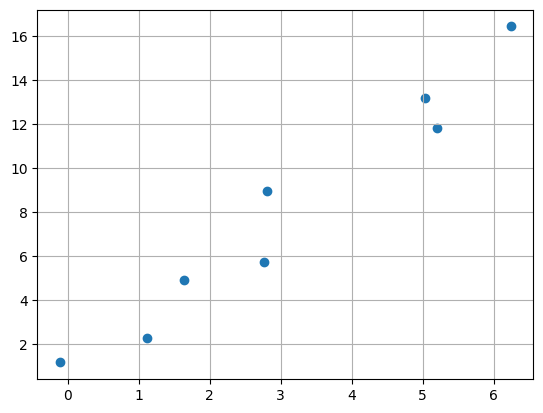

In [16]:
th.manual_seed(123) # to ensure reproducibility
var= 1 #
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5
#
_ = plt.scatter(X,Y)
plt.grid("minor")

Our goal is to approximate this simple data set with a function $f$ such that
$$
y_i \approx f(x_i)
$$
To find the right set of parameters that defines $f$, we want to minimize the mean square error:
$$ L = \sum_i (f(x_i) - y_i)^2.$$
Our first assumption is that $f$ is a linear function:
$$ f(x) = wx+w_0.$$

The optimization program (or the gradient descent) starts with the random initialization of  the parameters $(w,w_0)$

In [17]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

If we plot the line and the training points, this is not good (or you are very lucky):

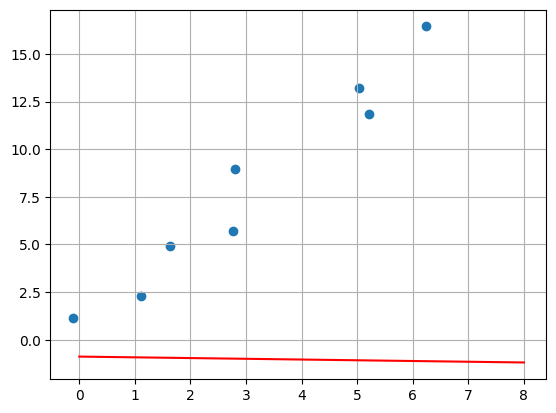

In [18]:
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)

plt.grid("minor")

**TODO**: To quantify the poor quality of this random initialization, compute the loss function.

L = $ \sum_i ( \hat{y_i} - y_i)^2$

In [19]:
Ys = (w*X+w0)
L = (Ys-Y).pow(2).sum()
print(L)

tensor(872.9790, grad_fn=<SumBackward0>)


**TODO:** Use the `backward` function to get the gradient of the loss with respect to the parameters.
- Print the gradients.
- Propose an update of the parameters
- Verify if it improves the loss function

In [20]:
L.backward()
print(w.grad)
print(w0.grad)

tensor([-616.5026])
tensor([-145.1270])


In [21]:
alfa = 0.001

w = w - alfa*w.grad
w0 = w - alfa*w0.grad

Ys = (w*X+w0)

def Loss_Function(Ys,Y):
  L = (Ys-Y).pow(2).sum()
  return L

L = Loss_Function(Ys,Y)
print(L)


tensor(371.1821, grad_fn=<SumBackward0>)


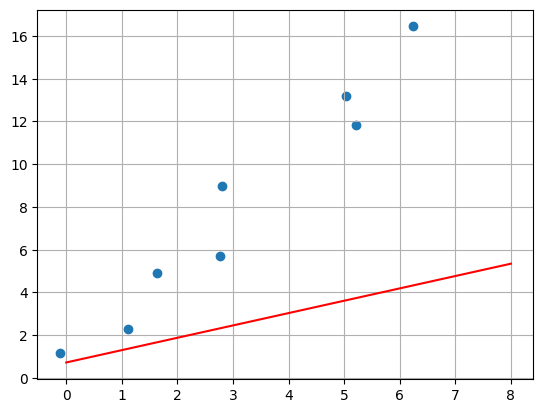

In [22]:
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)
plt.grid("minor")

# Optimizer

The optimizer is an object that takes care of the parameter updates. The base class is `Optimizer` and the code is in the module `torch.optim`. Among the possible optimizer you can look at the documentation of `SGD`:

**TODO:**
- Explain the parameters `lr`;
- `weight_decay`;


In the future, you will also use `Adam`, but for the moment we focus on `SGD`.  
They all have the same (more or less) the same interface.
To create an optimizer we need to create an object `SGD` with:
- the parameters under consideration
- and the lr parameter.

Assume here we want to learn `w` and `w0`:

In [23]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr=1)

The two important functions are:
- `step` take the gradient of all the trainable parameters and make the update (remember we now have values for `w.grad` and `w0.grad`)
- and `zero_grad` resets the gradient values for a next training step.  

**TODO:**
- Compute the predicions for `X`
- Do the backward propagation and print `w,w0` with their gradients
- Make an update  and print `w,w0` with their gradients
- Run `zero_grad`  and print `w,w0` with their gradients
- Plot the new line defined by `w,w0`.
- Do you think the value of `lr` is adapted ?

In [24]:
# Compute the predicions for X
Ys = w * X + w0
L = Loss_Function(Ys,Y)
print(Ys)
print(L)
# Do the backward propagation and print w,w0 with their gradients
L.backward()
print('\n \n Computing w,w0 with their gradients: \n')
print('w:', w, '\n','w.grad:', w.grad)
print('w0:', w0,'\n','w0.grad:', w0.grad, '\n\n')

# Make an update and print w,w0 with their gradients
sgd.step()
print('Step: \n')
print('w:', w, '\n','w.grad:', w.grad)
print('w0:', w0,'\n','w0.grad:', w0.grad, '\n\n')

# Run zero_grad and print w,w0 with their gradients
sgd.zero_grad()
print('Zero grad: \n')
print('w:', w, '\n','w.grad:', w.grad)
print('w0:', w0,'\n','w0.grad:', w0.grad, '\n\n')

tensor([-0.3744, -0.9545, -1.1946, -1.7264, -1.7469, -2.8799, -2.7944, -3.3677],
       grad_fn=<AddBackward0>)
tensor(1085.4353, grad_fn=<SumBackward0>)

 
 Computing w,w0 with their gradients: 

w: tensor([-0.4709], requires_grad=True) 
 w.grad: tensor([-689.6369])
w0: tensor([-0.4269], requires_grad=True) 
 w0.grad: tensor([-159.1206]) 


Step: 

w: tensor([689.1660], requires_grad=True) 
 w.grad: tensor([-689.6369])
w0: tensor([158.6937], requires_grad=True) 
 w0.grad: tensor([-159.1206]) 


Zero grad: 

w: tensor([689.1660], requires_grad=True) 
 w.grad: None
w0: tensor([158.6937], requires_grad=True) 
 w0.grad: None 




# The training function

**TODO:***
Now you have everything to write the training code of the model:
- initialization of the parameters
- loop of gradient descent
- record the loss evolution after each epoch
- plot the loss evolution along the training process
- look at the new decision boundary


In [25]:
## Your code here
loss_fn = lambda ypred, yreal : Loss_Function(ypred, yreal)

def Train(Nepoch,lr):
  w = th.randn(1,requires_grad=True)
  w0 = th.randn(1,requires_grad=True)
  trainable_parameters = (w,w0)
  sgd = th.optim.SGD(trainable_parameters, lr)
  Loss_serie = []
  for i in range(Nepoch):
    # Compute the predictions
    y_pred = w * X + w0

    # Compute the loss and perform backward propagation
    Loss = loss_fn(y_pred,Y)
    Loss_serie.append(float(Loss))

    Loss.backward()
    sgd.step()
    sgd.zero_grad()

  plt.figure()
  plt.plot(X, y_pred.detach().numpy(),'r')
  plt.scatter(X,Y)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('SGD for 10 iterations')
  plt.legend(['Regression', 'Points'])
  plt.grid('minor')
  plt.figure()
  plt.plot(Loss_serie, color='k')
  plt.xlabel('# iteration')
  plt.xlabel('Loss Function')
  plt.grid('minor')
  plt.show()



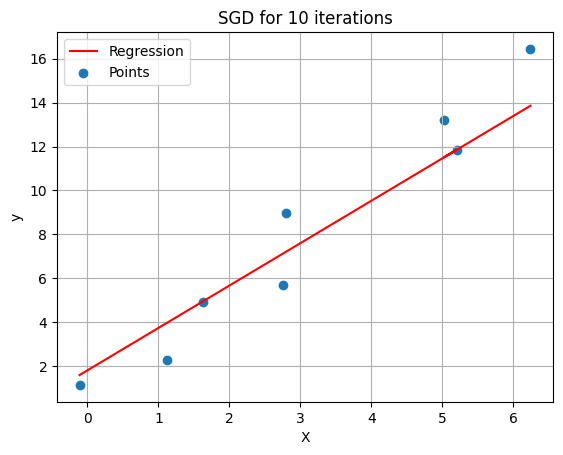

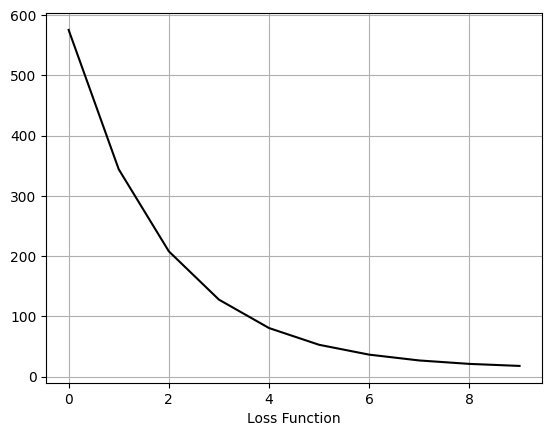

In [26]:
Nepoch = 10
lr = 1e-3

Train(Nepoch,lr)


# Module
In the previous code we define our model "by hand". In practice, it is more convenient to use existing module (base class `Module`). For instance the linear transform $f(x) = wx+w_0$ is simply the application of a `Linear` module.

**TODO**
- Look at the documentation
- rewrite the training code to use a `Linear` module.
- Look at the result.

In [27]:
import torch as th
import torch.nn as nn

loss_fn = nn.MSELoss()

## Your code here
def Train2(model,Nepoch = 30,lr = 1e-3):
  sgd = th.optim.SGD(model.parameters(), lr)
  Loss_serie = []

  for i in range(Nepoch):
    # Compute the predictions
    y_pred = model(X)

    # Compute the loss and perform backward propagation
    Loss = loss_fn(y_pred, Y)
    Loss_serie.append(float(Loss))

    Loss.backward()
    sgd.step()
    sgd.zero_grad()

  plt.figure()
  plt.plot(X, y_pred.detach().numpy(),'r')
  plt.scatter(X,Y)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('SGD for 10 iterations')
  plt.legend(['Regression', 'Points'])
  plt.grid('minor')
  plt.figure()
  plt.plot(Loss_serie, color='k')
  plt.xlabel('# iteration')
  plt.xlabel('Loss Function')
  plt.grid('minor')
  plt.show()


torch.Size([8, 1]) torch.Size([8, 1])


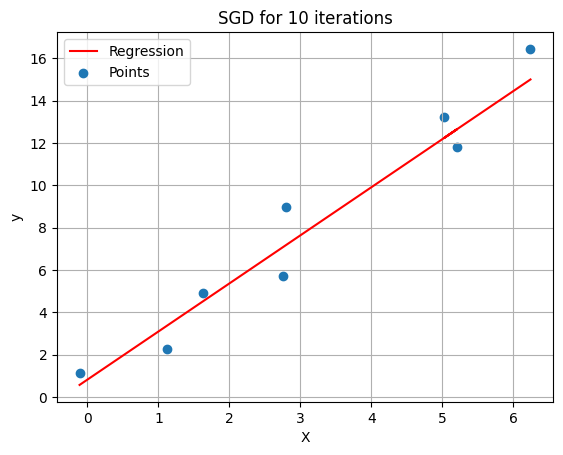

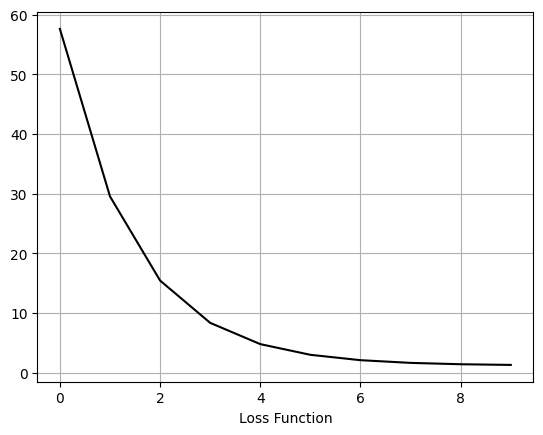

In [28]:
th.manual_seed(123) # to ensure reproducibility
var = 1 #
nPoint = 8

# We have 8 different points. Each input point have dimension 1 (1 feature/channel)
# because it is an escalar and its output has the same characteristics.
X, Y = th.zeros([nPoint,1]) , th.zeros([nPoint,1])

print(X.shape, Y.shape) #Number of point, number of channels

X[:,0] = th.arange(8) + th.randn(8)/var
Y[:,0] = 2*(th.arange(8) + th.randn(8)/var) + 0.5

model = nn.Linear(1,1) # dimension input and output : both escalars = 1
Nepoch = 10
lr = 1e-2


Train2(model, Nepoch, lr)


See that if we inverse the sizes of the inputs and outputs we will create a diferente linear regression with more parameters:

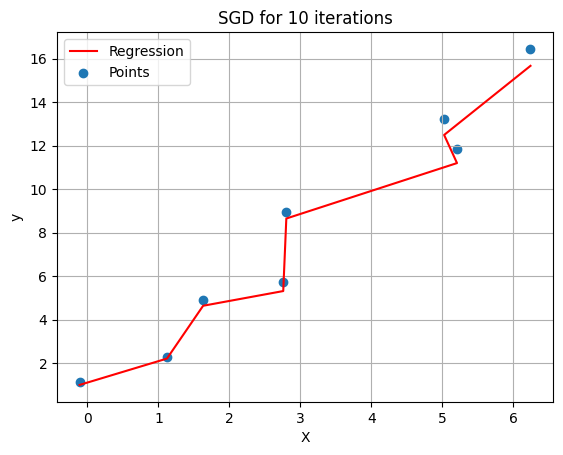

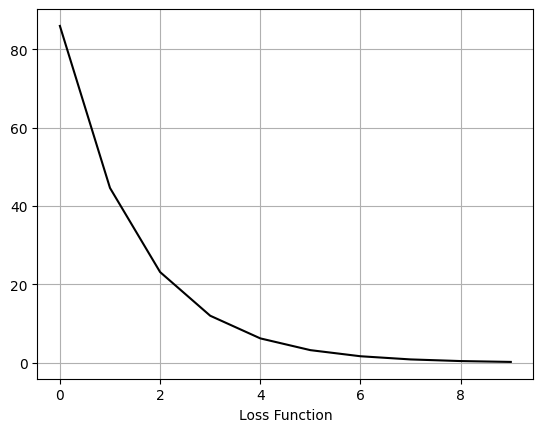

In [29]:
th.manual_seed(123) # to ensure reproducibility
var = 1 #
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5
 #Transpose of the vector, now it is [1,8]

model = nn.Linear(8,8) # dimension input and output : both escalars = 1
Nepoch = 10
lr = 1e-2


Train2(model, Nepoch, lr)

# Logistic Regression
Let start with an easy dataset for binary classification. The following subsections just provide a dummy dataset and function to visualize the data-set.



## Create the data


In [30]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2
Xstudents = np.concatenate((ST1,ST2),axis=1).T
Ystudents = np.ones(14)
Ystudents[7:] = 0

print(Xstudents.shape, Ystudents.shape)


(14, 2) (14,)


Can you plot the dataset with two colors (one for each class) ?


In [31]:
print(Ystudents == 1,Xstudents[Ystudents == 0])

[ True  True  True  True  True  True  True False False False False False
 False False] [[ 4.   8. ]
 [ 7.5  5. ]
 [10.   0. ]
 [11.   5. ]
 [ 5.   0. ]
 [ 5.  10. ]
 [ 6.   6. ]]


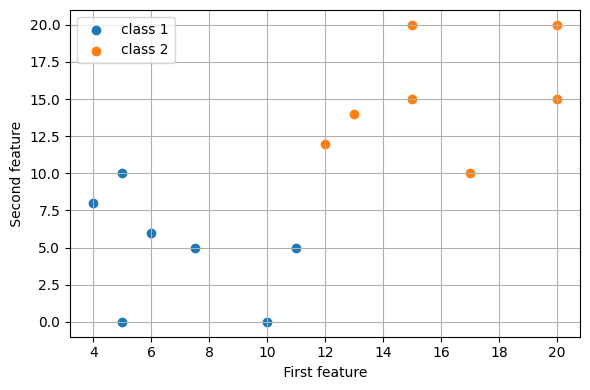

In [32]:
classes = ('class 1', 'class 2')
def plot(X, Y):

  T = 6
  fig, axs = plt.subplots(1,1,figsize = (T, T/1.5),tight_layout = True)

  for i in range(2):
    axs.scatter(X[Y == i,0],X[Y == i,1], label = classes[i])

  axs.set_xlabel(r" First feature ")
  axs.set_ylabel(r" Second feature ")
  plt.grid('minor')
  plt.legend()
  plt.show()

plot(Xstudents, Ystudents)

## The model


Define a logistic regression model with pytorch, learn it and vizualise the result.
The roadmap is:
* A simple neural model can rely on  **Sequential**. A model handles  **Tensors**. The data for a model should be converted into Tensors. Start by this transformation.
* Create a regression model  (a single neuron with the logistic activation function, or a linear layer with one single neuron with the logistic activation).
* Define the '**optimizer** (Take the basic Stochastic Gradient Descent).
* Define the objective function
* Write the training loop and run it until convergence. It can be useful to play with learning rate. Run the gradient descent example by example.
* Look at the solution
* Start again in  **batch** mode (the gradient is estimated on the whole training set).



## From data to tensors / variables


In [33]:
# Transform data to tensors
X = th.tensor(Xstudents, dtype=th.float32) #dtype is supported by nn.Linear
Y = th.tensor(Ystudents, dtype=th.long) #Necessary to compute the NLLLoss
#Y = th.tensor(Ystudents, dtype=th.float32).view(-1,1) #Necessary to compute the MSELoss
print('X = ',X.shape,'\n Y = ',Y.shape[0])

X =  torch.Size([14, 2]) 
 Y =  14


## Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model.

In [34]:
# The model
D_in = 2  # input size : 2 features
D_out = 2 # output size: 2 possible classifications
N = Y.shape[0]
model = nn.Sequential(nn.Linear(D_in, D_out), nn.LogSoftmax(dim=1))



## Testing the model with data
Just run inference to see if everything is fine.


Probabilities class 1 and class 2 tensor([[9.2000e-06, 9.9999e-01],
        [5.2539e-06, 9.9999e-01],
        [8.1209e-07, 1.0000e+00],
        [2.3029e-07, 1.0000e+00],
        [3.7287e-09, 1.0000e+00],
        [7.7499e-08, 1.0000e+00],
        [1.2548e-09, 1.0000e+00],
        [8.1183e-04, 9.9919e-01],
        [4.4793e-03, 9.9552e-01],
        [1.3883e-01, 8.6117e-01],
        [2.0949e-03, 9.9791e-01],
        [3.2388e-01, 6.7612e-01],
        [1.2557e-04, 9.9987e-01],
        [2.7272e-03, 9.9727e-01]], grad_fn=<ExpBackward0>) 
 Predicted output :  tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]]) 
 Real ouput :  tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])


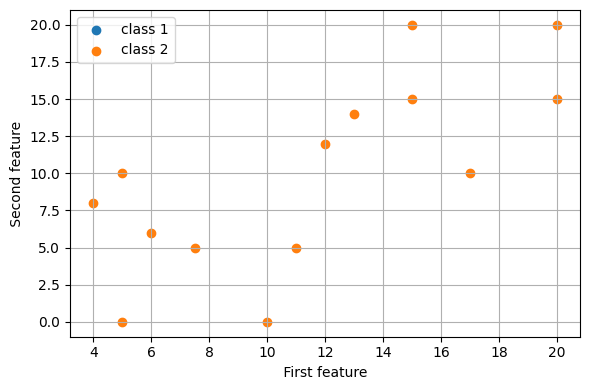

50.0


In [35]:
logprobs = model(X)
probs = th.exp(logprobs) #Probabilities of being [class1, class2]
maxlogprob , Ypred = logprobs.topk(1) #Take the higher probability

print("Probabilities class 1 and class 2", probs, "\n Predicted output : ", Ypred, "\n Real ouput : ", Y)

plot(X, Ypred.squeeze())
accuracy = (Ypred.T == Y).sum().float()
accuracies= accuracy.item()*100.0/N
print( accuracies )

It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it.

**TODO:** Modify the code above to do that.

## Training loop

**TODO:** Now we have everything to train the model.

In [36]:
### The loss function
#loss_fn = nn.MSELoss()
loss_fn = nn.NLLLoss()
print(Y.shape, logprobs.shape)
print(loss_fn(logprobs, Y))


torch.Size([14]) torch.Size([14, 2])
tensor(2.6201, grad_fn=<NllLossBackward0>)


In [37]:
## Your code here
def Train(model,Nepoch = 30,lr = 1e-2):
  optimizer= th.optim.Adam(model.parameters(), lr)
  Loss_serie, accuracies = [], []
  N = Y.shape[0]
  labels = Y #Validation labels

  for i in range(Nepoch):
      # Compute the predictions
      optimizer.zero_grad()
      logprobs = model(X)

      # Compute the loss and perform backward propagation
      Loss = loss_fn(logprobs, labels)
      Loss_serie.append(Loss.item())

      Loss.backward()
      optimizer.step()

      probs = th.exp(logprobs) #Probabilities of being [class1, class2]
      maxlogprob , Ypred = logprobs.topk(1) #Take the higher probability
      accuracy = (Ypred.T == labels).sum().float()
      accuracies.append(accuracy.item()*100.0/N)

  fig, ax = plt.subplots(1,2,figsize = (6, 3), tight_layout = True)
  fig.suptitle("learning rate {lr}".format(lr=lr), fontsize=13)
  ax[0].plot(Loss_serie,'r')
  ax[0].set_ylabel(r" Train losses ", size=15)
  ax[0].set_xlabel(r" Epoch ", size=15)
  ax[0].grid('minor')
  ax[0].set_ylim(bottom=0)
  ax[1].plot(accuracies,'r')
  ax[1].set_ylim(bottom=0)
  ax[1].set_ylabel(r" Accuracy ", size=15)
  ax[1].set_xlabel(r" Epoch ", size=15)
  ax[1].grid('minor')
  ax[1].set_ylim([0,101])

  plt.show()

  return Loss_serie[-1], accuracies[-1]

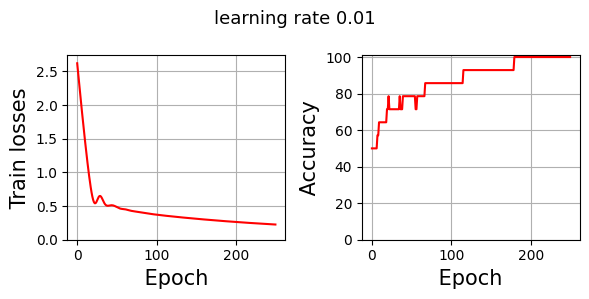

(0.22582867741584778, 100.0)

In [38]:
Train(model, Nepoch = 250)

2. we use the loss function of Pytorch libraries

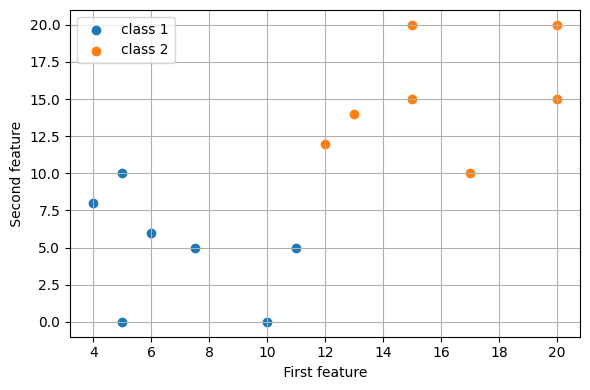

In [39]:
logprobs = model(X)
probs = th.exp(logprobs) #Probabilities of being [class1, class2]
maxlogprob , Ypred = logprobs.topk(1) #Take the higher probability

plot(X, Ypred.squeeze())

## Explore the "solution"

Here, we look at the different wrapping steps:
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [40]:
mod = model[0]
print(type(mod))
print(type(mod.bias))
print(type(mod.bias.data))
print(type(mod.bias.data.numpy()))


<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


We can look at the parameters:

In [41]:
print(mod.bias.data)
print(mod.weight.data)

tensor([ 1.7325, -1.3854])
tensor([[-0.1216,  0.1233],
        [ 0.0096,  0.3392]])


## Impact of the learning rate

Now, we will use the same model trained with a different learning rate. The training process restarts from scratch. We need to therefore to re-create the model and the associated optimizer.

In [42]:

D_in = 2  # input size : 2 features
D_out = 2 # output size: 2 possible classifications
N = Y.shape[0]
model = nn.Sequential(nn.Linear(D_in, D_out), nn.LogSoftmax(dim=1))
sd = model.state_dict()

We now have the same model as before, randomly initialized. We train this same model with a different learning rate, a larger one.

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ?
- Try the same thing with a learning rate of 0.5, what do you observe ?



[0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.]


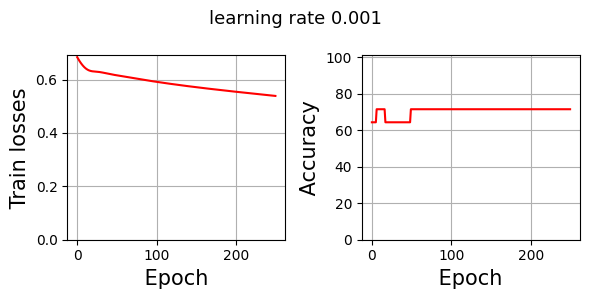

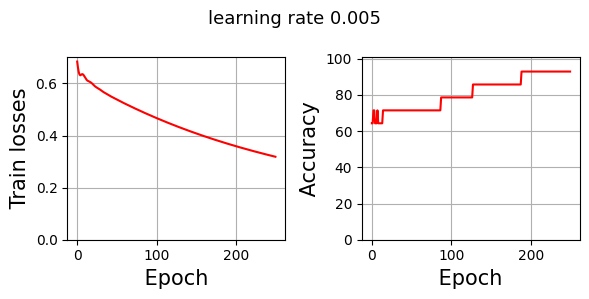

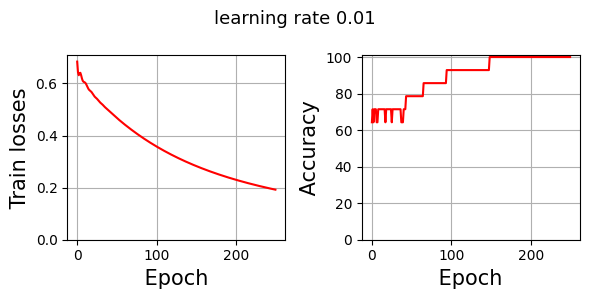

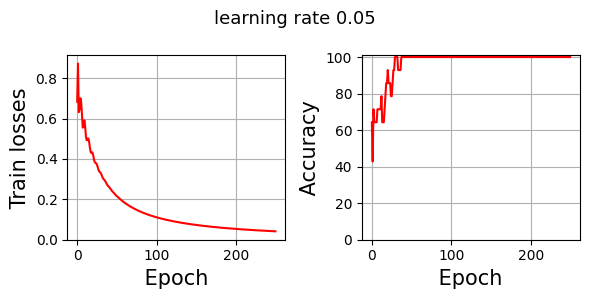

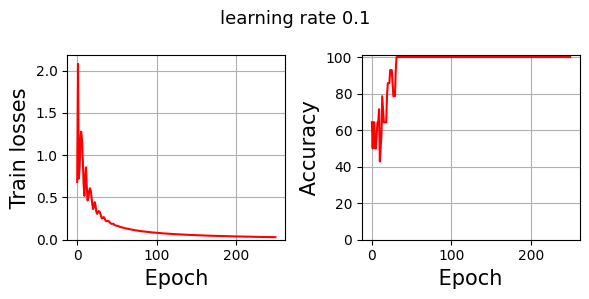

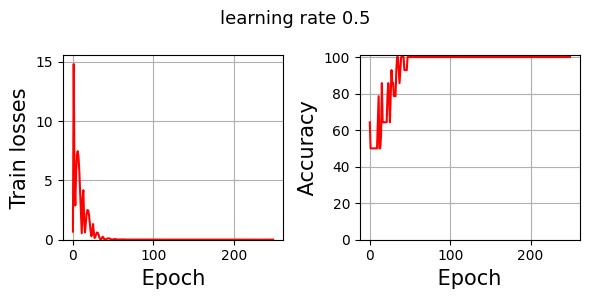

In [43]:
# New learning rate

lr = [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
N = len(lr)
loss = np.zeros(N)
accuracy = np.zeros(N)

print(loss, accuracy)

for i in range(N):
  model_ = nn.Sequential(nn.Linear(D_in, D_out), nn.LogSoftmax(dim=1))
  model_.load_state_dict(sd)
  loss[i], accuracy[i] = Train(model_, Nepoch = 250, lr = lr[i])



(0.0, 101.42857142857143)

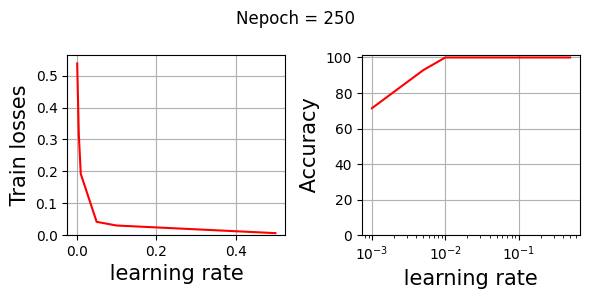

In [48]:
  fig, ax = plt.subplots(1,2,figsize = (6, 3), tight_layout = True)
  fig.suptitle('Nepoch = {}'.format(250))
  ax[0].plot(lr,loss,'r')
  ax[0].set_ylabel(r" Train losses ", size=15)
  ax[0].set_xlabel(r" learning rate ", size=15)
  ax[0].grid('minor')
  ax[0].set_ylim(bottom=0)
  ax[1].semilogx(lr,accuracy,'r')
  ax[1].set_ylim(bottom=0)
  ax[1].set_ylabel(r" Accuracy ", size=15)
  ax[1].set_xlabel(r" learning rate ", size=15)
  ax[1].grid('minor')
  ax[1].set_ylim(bottom=0)